In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
with open("of_preds.pkl", "rb") as f:
    of_preds = pickle.load(f)

deltas_gen = dict()
deltas_of = dict()

In [3]:
for key, val in of_preds.items():
    print(key)
    print(len(val))

0.0
2
5.0
2
10.0
2
15.0
2
20.0
2
1.0526315789473684
2
2.1052631578947367
2
3.1578947368421053
2
4.2105263157894735
2
5.263157894736842
2
6.315789473684211
2
7.368421052631579
2
8.421052631578947
2
9.473684210526315
2
10.526315789473683
2
11.578947368421051
2
12.631578947368421
2
13.68421052631579
2
14.736842105263158
2
15.789473684210526
2
16.842105263157894
2
17.894736842105264
2
18.94736842105263
2


In [4]:
def triangular_discriminator(p, q, bin_widths):
    """
    Triangular discriminator:
      0.5 * sum_i [((p_i - q_i)^2)/(p_i + q_i)] * bin_width_i * 1e3
    Bins where p_i + q_i = 0 contribute zero.
    """
    denom = p + q
    mask = denom > 0
    val = np.zeros_like(p)
    val[mask] = (p[mask] - q[mask])**2 / denom[mask]
    return 0.5 * np.sum(val * bin_widths) * 1e3

In [5]:
sorted_keys = sorted([float(k) for k in of_preds.keys()])
print([f"{k:.3f}" for k in sorted_keys])

['0.000', '1.053', '2.105', '3.158', '4.211', '5.000', '5.263', '6.316', '7.368', '8.421', '9.474', '10.000', '10.526', '11.579', '12.632', '13.684', '14.737', '15.000', '15.789', '16.842', '17.895', '18.947', '20.000']


In [6]:
for smearing in of_preds.keys():
    delta_gen_list = []
    delta_of_list = []
    for triplet in of_preds[smearing]:
        truth_test, gen_test, of_weights = triplet

        # Build histograms with density=True
        counts_truth, bin_edges = np.histogram(truth_test, density=True)
        counts_gen,   _         = np.histogram(gen_test, density=True)
        # Use the event-level weights when making the histogram for the reweighted gen.
        counts_of,    _         = np.histogram(gen_test, weights=np.atleast_2d(of_weights).T, density=True)
        
        bin_widths = np.diff(bin_edges)
    
        # Compute the triangular discriminators for this triplet
        delta_gen = triangular_discriminator(counts_gen, counts_truth, bin_widths)
        delta_of  = triangular_discriminator(counts_of,  counts_truth, bin_widths)
        
        # Append the individual delta values
        delta_gen_list.append(delta_gen)
        delta_of_list.append(delta_of)
        
    # Average the deltas over the K triplets for this smearing value
    deltas_gen[smearing] = (np.mean(delta_gen_list), np.std(delta_gen_list)/np.sqrt(len(delta_gen_list) - 1))
    deltas_of[smearing] = (np.mean(delta_of_list), np.std(delta_of_list)/np.sqrt(len(delta_of_list) - 1))

NameError: name 'ran_means' is not defined

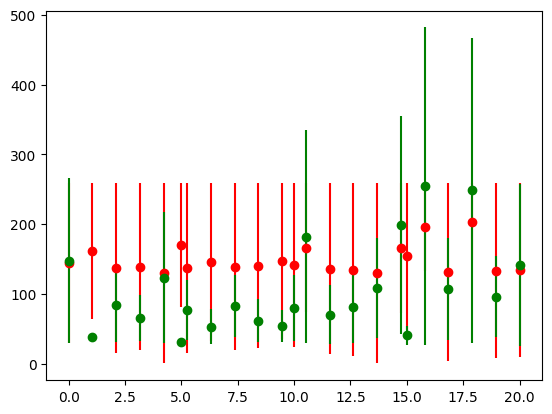

In [7]:
gen_means = [deltas_gen[k][0] for k in sorted_keys]
gen_errs  = [deltas_gen[k][1] for k in sorted_keys]

# Extract means and errors for the OF vs Truth data
of_means  = [deltas_of[k][0] for k in sorted_keys]
of_errs   = [deltas_of[k][1] for k in sorted_keys]

# Plot using error bars
plt.errorbar(sorted_keys, gen_means, yerr=gen_errs, fmt='o', color='r', label='delta_gen')
plt.errorbar(sorted_keys, of_means, yerr=of_errs, fmt='o', color='g', label='delta_of')
plt.plot(sorted_keys, ran_means, marker='o', color = 'b', label = 'delta_ran')

# Add labels and legend
plt.xlabel("Smearing")
plt.ylabel("Triangular Discriminator")
plt.legend()
plt.savefig("Triangular Discriminator.pdf")

In [8]:
ran_means = np.load("ran_means.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'ran_means.npy'

NameError: name 'ran_means' is not defined

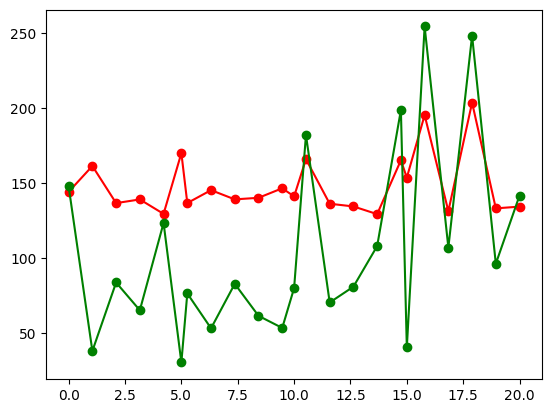

In [9]:
plt.plot(sorted_keys, gen_means, marker='o', color='r', label='delta_gen')
plt.plot(sorted_keys, of_means, marker='o', color='g', label='delta_of')
plt.plot(sorted_keys, ran_means, marker='o', color = 'b', label = 'delta_ran')
plt.legend()
plt.savefig("OF_RAN_comp.pdf", bbox_inches = 'tight')

In [3]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
print("GPUs detected:", gpus)

GPUs detected: []
